# HREF Model Tutorial
A demonstration of data retrieval from the High Resolution Ensemble Forecast (HREF)<br>
Added by Karl Schneider (June 2024)

In [1]:
import sys
sys.path.append('/home/meteo/kps5442/mapwall_dev/herbie-dev/')

In [2]:
from herbie import Herbie
import pandas as pd
import matplotlib.pyplot as plt
from toolbox import EasyMap, pc

## Exploring the available products

In [3]:
dt = pd.Timestamp("now", tz="utc").floor('12h').replace(tzinfo=None)

In [4]:
H = Herbie(dt, model="href", product="mean", region="conus", fxx=1)

✅ Found ┊ model=href ┊ product=mean ┊ 2024-Jun-07 12:00 UTC F01 ┊ GRIB2 @ nomads ┊ IDX @ nomads


In [5]:
H.inventory()

,grib_message,start_byte,end_byte,range,reference_time,valid_time,variable,level,forecast_time,?,search_this
0,1,0,300500.0,0-300500,2024-06-07 12:00:00,2024-06-07 13:00:00,APCP,surface,0-1 hour acc fcst,wt ens mean,:APCP:surface:0-1 hour acc fcst:wt ens mean
1,2,300501,489778.0,300501-489778,2024-06-07 12:00:00,2024-06-07 13:00:00,WEASD,surface,0-1 hour acc fcst,wt ens mean,:WEASD:surface:0-1 hour acc fcst:wt ens mean
2,3,489779,876409.0,489779-876409,2024-06-07 12:00:00,2024-06-07 13:00:00,CAPE,90-0 mb above ground,1 hour fcst,wt ens mean,:CAPE:90-0 mb above ground:1 hour fcst:wt ens ...
3,4,876410,1330589.0,876410-1330589,2024-06-07 12:00:00,2024-06-07 13:00:00,CAPE,180-0 mb above ground,1 hour fcst,wt ens mean,:CAPE:180-0 mb above ground:1 hour fcst:wt ens...
4,5,1330590,1755750.0,1330590-1755750,2024-06-07 12:00:00,2024-06-07 13:00:00,CAPE,surface,1 hour fcst,wt ens mean,:CAPE:surface:1 hour fcst:wt ens mean
...,...,...,...,...,...,...,...,...,...,...,...
57,58,28080535,28443122.0,28080535-28443122,2024-06-07 12:00:00,2024-06-07 13:00:00,VVEL,700-500 mb,1 hour fcst,wt ens mean,:VVEL:700-500 mb:1 hour fcst:wt ens mean
58,59,28443123,28869880.0,28443123-28869880,2024-06-07 12:00:00,2024-06-07 13:00:00,VWSH,surface,1 hour fcst,wt ens mean,:VWSH:surface:1 hour fcst:wt ens mean
59,60,28869881,29184610.0,28869881-29184610,2024-06-07 12:00:00,2024-06-07 13:00:00,HINDEX,surface,1 hour fcst,wt ens mean,:HINDEX:surface:1 hour fcst:wt ens mean
60,61,29184611,29618526.0,29184611-29618526,2024-06-07 12:00:00,2024-06-07 13:00:00,VWSH,0-6000 m above ground,1 hour fcst,wt ens mean,:VWSH:0-6000 m above ground:1 hour fcst:wt ens...


For the HREF, you must specify both "product" and "region"

In [6]:
H.PRODUCTS

{'mean': 'Arithmetic mean of all members.',
 'pmmn': 'A “probability matched” mean, which combines information from the ensemble mean with the amplitude of the individual members. This version is computed over the full domain simultaneously.',
 'lpmm': 'A localized “probability matched” mean, which combines information from the ensemble mean with the amplitude of the individual members. This version is computed over small regions, which then are assembled to cover the full domain. Only for precipitation.',
 'avrg': 'An averaging of the mean and pmmn output. Only for precipitation.',
 'sprd': 'The spread of the ensemble, which is a measure of how different the individual model runs are for a variable at a given point (smaller spread indicates better agreement within the ensemble)',
 'prob': 'Probabilistic output; the percentage of the membership meeting a specified threshold such as > 0.5” of accumulated precipitation in a 6 h period). A mix of point probabilities and neighborhood maxim

Available regions are:
- `conus`: Continental US, available at 00, 06, 12, and 18 UTC
- `ak`: Alaska domain, available at 06 and 18 UTC
- `hi`: Hawaii domain, available at 00 and 12 UTC
- `pr`: Puerto Rico domain, available at 00 and 12 UTC

Currently, the only data source I know of is NOMADS, so it does not need to be specified.

## Data download and plot example

In [7]:
H = Herbie(dt, model="href", product="prob", region="conus", fxx=24)

✅ Found ┊ model=href ┊ product=prob ┊ 2024-Jun-07 12:00 UTC F24 ┊ GRIB2 @ nomads ┊ IDX @ nomads


In [8]:
# Find the probability of precip exceeding 12.7mm (0.5 inch) in the 0-24 hr period
H.inventory(r"APCP:.+:prob\s>12.7:")

,grib_message,start_byte,end_byte,range,reference_time,valid_time,variable,level,forecast_time,?,??,???,search_this
48,49,14048126,14266993.0,14048126-14266993,2024-06-07 12:00:00,2024-06-08 12:00:00,APCP,surface,23-24 hour acc fcst,prob >12.7,prob fcst 0/10,Neighborhood Probability,:APCP:surface:23-24 hour acc fcst:prob >12.7:p...
52,53,14857572,15092508.0,14857572-15092508,2024-06-07 12:00:00,2024-06-08 12:00:00,APCP,surface,21-24 hour acc fcst,prob >12.7,prob fcst 0/10,Neighborhood Probability,:APCP:surface:21-24 hour acc fcst:prob >12.7:p...
57,58,15896347,16148669.0,15896347-16148669,2024-06-07 12:00:00,2024-06-08 12:00:00,APCP,surface,18-24 hour acc fcst,prob >12.7,prob fcst 0/10,Neighborhood Probability,:APCP:surface:18-24 hour acc fcst:prob >12.7:p...
62,63,16979008,17270619.0,16979008-17270619,2024-06-07 12:00:00,2024-06-08 12:00:00,APCP,surface,12-24 hour acc fcst,prob >12.7,prob fcst 0/10,Neighborhood Probability,:APCP:surface:12-24 hour acc fcst:prob >12.7:p...
68,69,18361271,18683805.0,18361271-18683805,2024-06-07 12:00:00,2024-06-08 12:00:00,APCP,surface,0-1 day acc fcst,prob >12.7,prob fcst 0/10,Neighborhood Probability,:APCP:surface:0-1 day acc fcst:prob >12.7:prob...


In [9]:
H.inventory(r"APCP:surface:0-1.+:prob\s>12.7:")

,grib_message,start_byte,end_byte,range,reference_time,valid_time,variable,level,forecast_time,?,??,???,search_this
68,69,18361271,18683805.0,18361271-18683805,2024-06-07 12:00:00,2024-06-08 12:00:00,APCP,surface,0-1 day acc fcst,prob >12.7,prob fcst 0/10,Neighborhood Probability,:APCP:surface:0-1 day acc fcst:prob >12.7:prob...


In [10]:
ds = H.xarray(r"APCP:surface:0-1.+:prob\s>12.7:")

In [11]:
ds

<xarray.Dataset> Size: 30MB
Dimensions:              (y: 1025, x: 1473)
Coordinates:
    time                 datetime64[ns] 8B 2024-06-07T12:00:00
    step                 timedelta64[ns] 8B 1 days
    surface              float64 8B 0.0
    latitude             (y, x) float64 12MB 12.19 12.2 12.21 ... 57.3 57.29
    longitude            (y, x) float64 12MB 226.5 226.6 226.6 ... 310.5 310.6
    valid_time           datetime64[ns] 8B 2024-06-08T12:00:00
    gribfile_projection  object 8B None
Dimensions without coordinates: y, x
Data variables:
    tp                   (y, x) float32 6MB nan nan nan nan ... nan nan nan nan
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          2
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    model:                   href
    product:                 prob
    description:             The High Resolution Ensemble Forecast (HREF)
    remote_grib:             https://nomads.ncep.noaa.gov/pub/data/nccf/com/h...
    local_grib:              /home/meteo/kps5442/data/href/20240607/subset_31...
    search:                  APCP:surface:0-1.+:prob\s>12.7:

Text(1.0, 1.0, 'Probability of 24-hr Precip > 0.5 in')

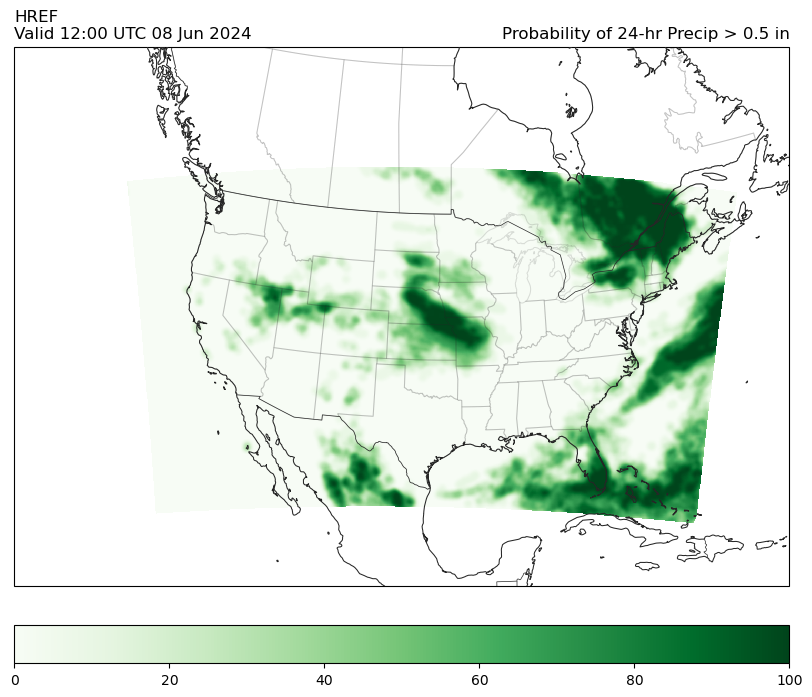

In [12]:
ax = EasyMap("50m", crs=ds.herbie.crs, figsize=[10, 10]).STATES().BORDERS().ax
p = ax.pcolormesh(
    ds.longitude, ds.latitude, ds.tp, transform=pc, cmap="Greens", vmin=0, vmax=100
)

plt.colorbar(
    p, ax=ax, orientation="horizontal", pad=0.05,
)

ax.set_title(
    f"{ds.model.upper()}\nValid {ds.valid_time.dt.strftime('%H:%M UTC %d %b %Y').item()}",
    loc="left",
)
ax.set_title("Probability of 24-hr Precip > 0.5 in", loc="right")